In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [6]:
cri_time = pd.read_csv('./data/crime_time.csv', encoding='euc-kr')
cri_time = cri_time[:17]
cri_time = cri_time.groupby(['범죄대분류']).sum()
cri_time = cri_time.drop(['미상'],axis=1)
cri_time

,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59,일,월,화,수,목,금,토
범죄대분류,,,,,,,,,,,,,,,
강력범죄,2920,3316,1977,1799,1966,2447,3089,4215,4081,3519,3607,3634,3445,3880,4310
절도범죄,13088,14167,13094,21501,27167,28553,27229,20568,25466,26239,25671,26061,26098,28156,29266
폭력범죄,31290,26880,17572,23112,23919,28939,39618,57944,45295,38034,38553,38905,39086,41198,46842


In [21]:
crime_time_d=cri_time.iloc[:,8:] #요일별 범죄
crime_time_d= crime_time_d.T
crime_time_d = crime_time_d.reindex(index=['월','화','수','목','금','토','일'])
crime_time_d

범죄대분류,강력범죄,절도범죄,폭력범죄
월,3519,26239,38034
화,3607,25671,38553
수,3634,26061,38905
목,3445,26098,39086
금,3880,28156,41198
토,4310,29266,46842
일,4081,25466,45295


In [26]:
row=['월','화','수','목','금','토','일']
column=['강력범죄','절도범죄','폭력범죄']

scaler = preprocessing.MinMaxScaler()
scaler.fit(crime_time_d)
crime_time_d_scaled = scaler.transform(crime_time_d)

crime_time_d_scaled = pd.DataFrame(data=crime_time_d_scaled,index=row,columns=column)
crime_time_d_scaled

,강력범죄,절도범죄,폭력범죄
월,0.085549,0.203421,0.000000
화,0.187283,0.053947,0.058924
수,0.218497,0.156579,0.098887
목,0.000000,0.166316,0.119437
금,0.502890,0.707895,0.359219
토,1.000000,1.000000,1.000000
일,0.735260,0.000000,0.824364


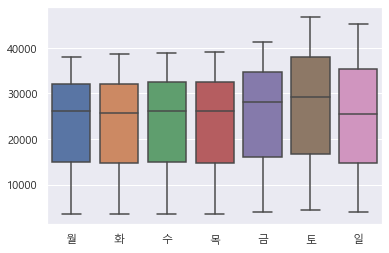

In [27]:
#요일별 범죄를 boxplot으로 비교. 한눈에 비교하기 어려움
total = crime_time_d.T
sns.boxplot(data = total)
plt.show()


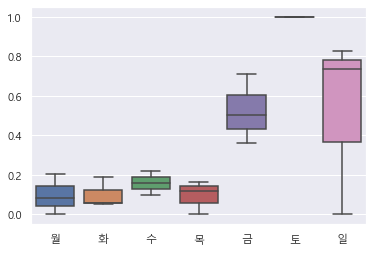

In [28]:
#요일별 범죄를 boxplot으로 비교. 정규화 값으로 비교
total = crime_time_d_scaled.T
sns.boxplot(data = total)
plt.show()

In [29]:
# 요일별 범죄 발생 비교 시각화
x = crime_time_d_scaled.index
y1 = crime_time_d_scaled['강력범죄'].values
y2 = crime_time_d_scaled['절도범죄'].values
y3 = crime_time_d_scaled['폭력범죄'].values

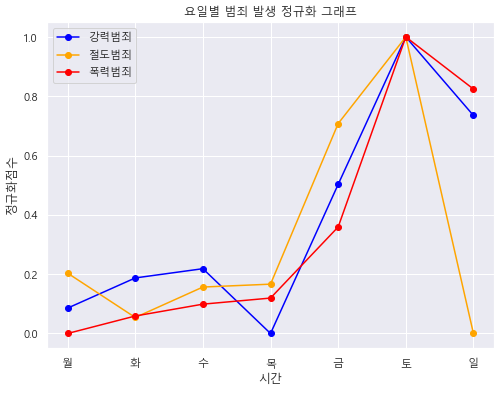

In [30]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x,y1, c= 'blue', marker = 'o', label='강력범죄')
ax.plot(x,y2, c= 'orange', marker = 'o', label = '절도범죄')
ax.plot(x,y3, c= 'red', marker = 'o',label = '폭력범죄')

ax.set_title('요일별 범죄 발생 정규화 그래프')
ax.set_xlabel('시간')
ax.set_ylabel('정규화점수')
ax.legend()

In [31]:
crime_time_t=cri_time.iloc[:,:8] #시간대별 범죄
crime_time_t=crime_time_t.T
crime_time_t

범죄대분류,강력범죄,절도범죄,폭력범죄
00:00-02:59,2920,13088,31290
03:00-05:59,3316,14167,26880
06:00-08:59,1977,13094,17572
09:00-11:59,1799,21501,23112
12:00-14:59,1966,27167,23919
15:00-17:59,2447,28553,28939
18:00-20:59,3089,27229,39618
21:00-23:59,4215,20568,57944


In [32]:
#정규화
row=['00:00-02:59','03:00-05:59','06:00-08:59','09:00-11:59','12:00-14:59','15:00-17:59','18:00-20:59','21:00-23:59']
column=['강력범죄','절도범죄','폭력범죄']

scaler = preprocessing.MinMaxScaler()

scaler.fit(crime_time_t)
crime_time_t_scaled=scaler.transform(crime_time_t)
crime_time_t_scaled=pd.DataFrame(data=crime_time_t_scaled,index=row,columns=column)
crime_time_t_scaled

,강력범죄,절도범죄,폭력범죄
00:00-02:59,0.463990,0.000000,0.339790
03:00-05:59,0.627897,0.069770,0.230556
06:00-08:59,0.073675,0.000388,0.000000
09:00-11:59,0.000000,0.544003,0.137224
12:00-14:59,0.069123,0.910378,0.157213
15:00-17:59,0.268212,1.000000,0.281557
18:00-20:59,0.533940,0.914387,0.546072
21:00-23:59,1.000000,0.483673,1.000000


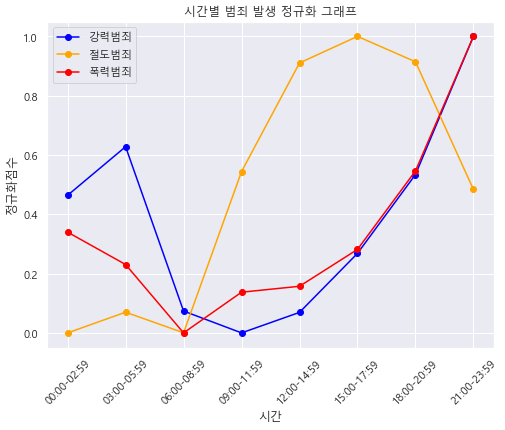

In [33]:
x = crime_time_t_scaled.index
y1 = crime_time_t_scaled['강력범죄'].values
y2 = crime_time_t_scaled['절도범죄'].values
y3 = crime_time_t_scaled['폭력범죄'].values

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x,y1, c= 'blue', marker='o',label='강력범죄')
ax.plot(x,y2, c= 'orange', marker='o',label = '절도범죄')
ax.plot(x,y3, c= 'red', marker='o',label = '폭력범죄')

ax.set_title('시간별 범죄 발생 정규화 그래프')
ax.set_xlabel('시간')
ax.set_ylabel('정규화점수')
plt.xticks(rotation = 45)
ax.legend()

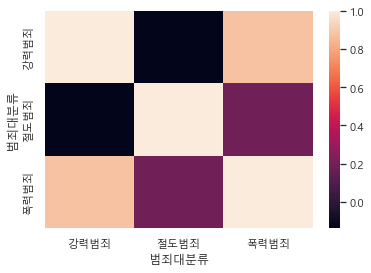

In [34]:
sns.heatmap(crime_time_t.corr())
plt.show()

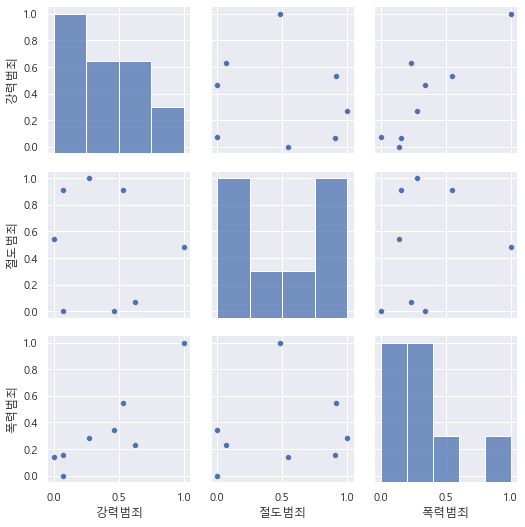

In [35]:
d = crime_time_t_scaled
grid = sns.PairGrid(d)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
plt.show()

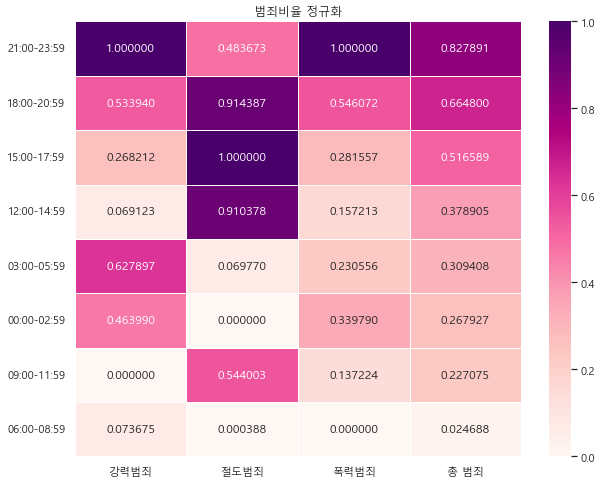

In [36]:
crime_time_t_scaled['총 범죄'] = np.sum(crime_time_t_scaled[column],axis=1) / 3
column.append('총 범죄')
crime_time_t_scaled_sort = crime_time_t_scaled.sort_values(by='총 범죄', ascending=False)
plt.figure(figsize=(10,8))

sns.heatmap(crime_time_t_scaled_sort[column], annot=True, fmt='f', linewidth=.5 , cmap='RdPu')
plt.title('범죄비율 정규화')
plt.show()